# Trading Strategy Performance Comparison

This notebook compares the performance of different trading strategies, including:
1. PrimoRL (with NLP features)
2. FinRL (benchmark)
3. Traditional Trading Strategies (benchmark):
   - Momentum Strategy
   - Price-MA Strategy
   - MACD Strategy
4. Buy and Hold Strategy (benchmark)

## Analysis Period
- Start Date: January 1, 2024
- End Date: July 31, 2024
- Purpose: Trading simulation phase evaluation

In [1]:
import pandas as pd
import numpy as np
import mplfinance as mpf
import matplotlib.pyplot as plt
import pickle

In [2]:
# Load finrl
with open('data/nflx_finrl_df_account_value_ppo.pkl', 'rb') as f:
    finrl_df = pickle.load(f)

# Load buy_and_hold
with open('data/nflx_finrl_buy_and_hold.pkl', 'rb') as f:
    buy_and_hold_df = pickle.load(f)

# Load momentum_strategy
with open('data/nflx_momentum_strategy.pkl', 'rb') as f:
    momentum_df = pickle.load(f)

# Load p_ma_strategy
with open('data/nflx_p_ma_strategy.pkl', 'rb') as f:
    p_ma_df = pickle.load(f)

# Load macd_strategy
with open('data/nflx_macd_strategy.pkl', 'rb') as f:
    macd_df = pickle.load(f)

# Load primorl
with open('data/nflx_primorl_df_account_value_ppo.pkl', 'rb') as f:
    primorl_df = pickle.load(f)

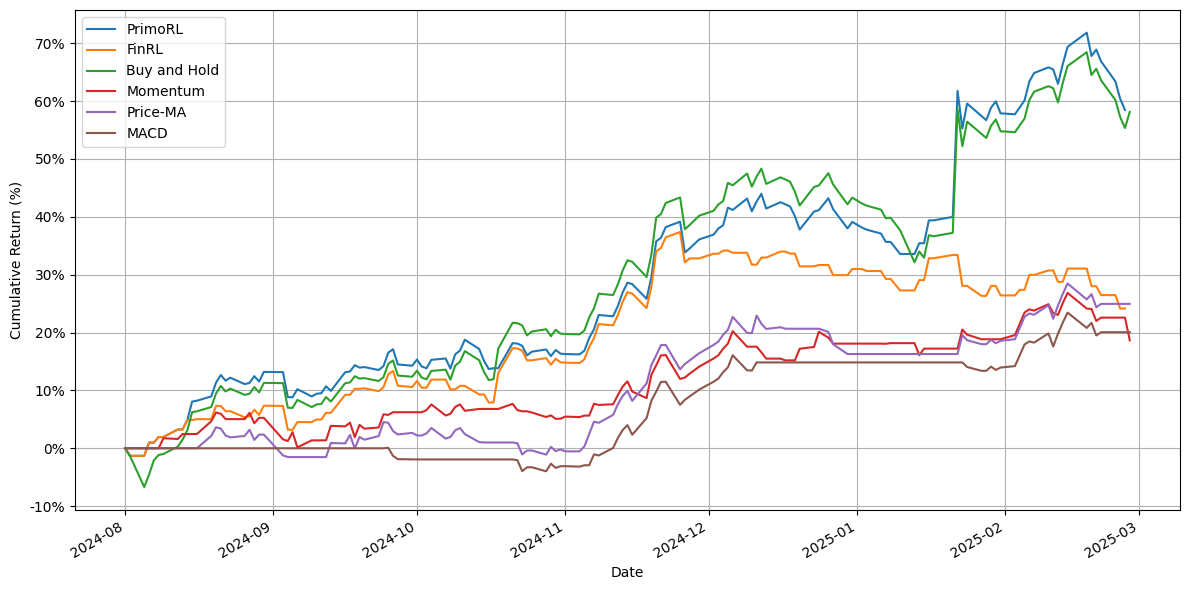

In [3]:
# Function to convert index to datetime and set it as index
def prepare_dataframe(df, date_column='date'):
    if date_column in df.columns:
        df[date_column] = pd.to_datetime(df[date_column])
        df.set_index(date_column, inplace=True)
    elif not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)
    return df.sort_index()

# Function to calculate cumulative return
def calculate_cumulative_return(series):
    return (series / series.iloc[0] - 1) * 100

# Prepare all DataFrames
finrl_df = prepare_dataframe(finrl_df)
buy_and_hold_df = prepare_dataframe(buy_and_hold_df)
momentum_df = prepare_dataframe(momentum_df, 'Date')
p_ma_df = prepare_dataframe(p_ma_df, 'Date')
macd_df = prepare_dataframe(macd_df, 'Date')
primorl_df = prepare_dataframe(primorl_df)

# Calculate cumulative returns
finrl_return = calculate_cumulative_return(finrl_df['account_value'])
buy_and_hold_return = calculate_cumulative_return(buy_and_hold_df['close'])
momentum_return = calculate_cumulative_return(momentum_df['Value'])
p_ma_return = calculate_cumulative_return(p_ma_df['Value'])
macd_return = calculate_cumulative_return(macd_df['Value'])
primorl_return = calculate_cumulative_return(primorl_df['account_value'])

# Plotting
plt.figure(figsize=(12, 6))

plt.plot(primorl_return.index, primorl_return, label='PrimoRL')
plt.plot(finrl_return.index, finrl_return, label='FinRL')
plt.plot(buy_and_hold_return.index, buy_and_hold_return, label='Buy and Hold')
plt.plot(momentum_return.index, momentum_return, label='Momentum')
plt.plot(p_ma_return.index, p_ma_return, label='Price-MA')
plt.plot(macd_return.index, macd_return, label='MACD')

plt.xlabel('Date')
plt.ylabel('Cumulative Return (%)')
plt.legend()
plt.grid(True)

# Format y-axis to show whole percentages
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x)}%'))

# Format x-axis for better date display
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()